In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('D:/Data_Analysis/BlackFriday.csv')

del df['Product_Category_2']
del df['Product_Category_3']

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# 1. Total Product Distribution

<AxesSubplot:title={'center':'Total Product Distributon'}, xlabel='Age'>

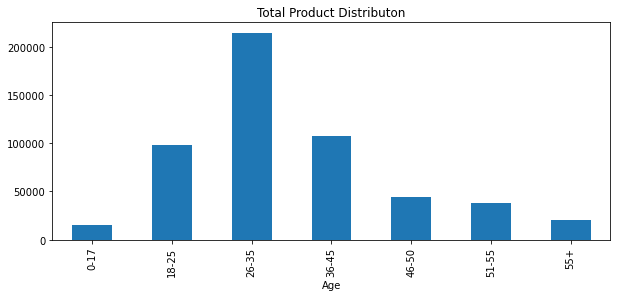

In [4]:
df.groupby('Age').size().plot(kind = 'bar', x = 'Age', title = 'Total Product Distributon', figsize = (10,4))

# 2. Unique Product Distribution by res. Age groups

<AxesSubplot:title={'center':'Unique Product Distribution'}, xlabel='Age'>

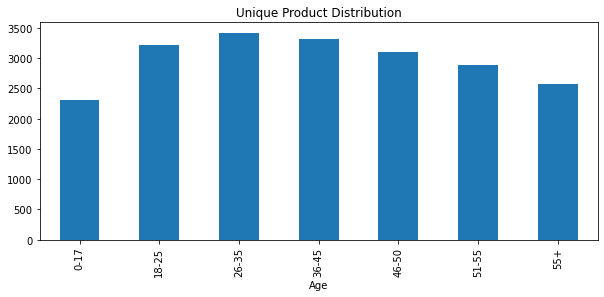

In [5]:
df_pr = df.groupby('Age')['Product_ID'].nunique()

df_pr.plot(kind = 'bar', x = 'Age', figsize = (10,4), title = 'Unique Product Distribution')

In [6]:
df[df['Age'] == '55+']['Product_ID'].nunique()

2573

In [7]:
for i in df['Age'].unique():
    print(df[df['Age'] == i]['Product_ID'].nunique(), end = '\t:')
    print(i)

2300	:0-17
2573	:55+
3419	:26-35
3099	:46-50
2877	:51-55
3318	:36-45
3213	:18-25


In [8]:
lst = []

for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
    
data = pd.DataFrame(lst, columns = ['Age', 'Unique_Products'])

data

,Age,Unique_Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


In [9]:
df[df['Age'] == '26-35'].nunique()

User_ID                        2053
Product_ID                     3419
Gender                            2
Age                               1
Occupation                       20
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      15776
dtype: int64

In [17]:
df[df['Age'] == '26-35']['Product_ID'].nunique()

3419

# 3. Total Purchase by respective Age groups

<AxesSubplot:title={'center':'Amount spent by respective Age groups'}, xlabel='Age'>

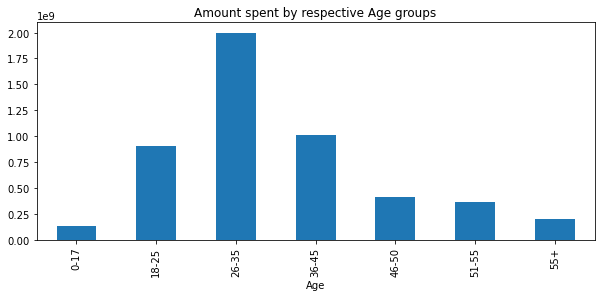

In [11]:
df_pr = df.groupby('Age').sum()['Purchase']

df_pr.plot(kind = 'bar', x = 'Age', figsize = (10,4), title = 'Amount spent by respective Age groups')

# 4. Average amount by respective Age groups

<AxesSubplot:title={'center':'Average amount spent by respective groups'}, xlabel='Age'>

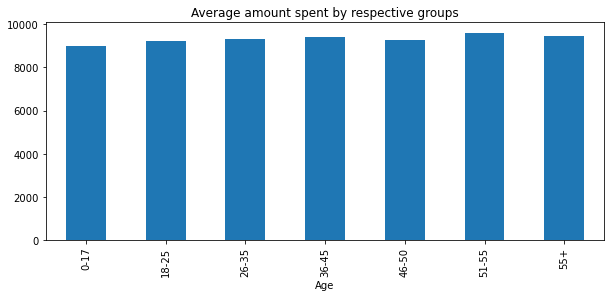

In [12]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'bar',
                                          x = 'Age',
                                          figsize = (10,4),
                                          title = 'Average amount spent by respective groups')

<AxesSubplot:title={'center':'Average amount spent by respective groups'}, ylabel='Purchase'>

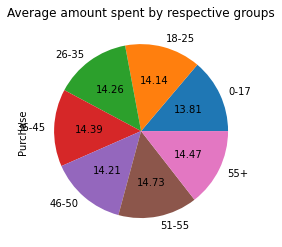

In [13]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', x = 'Age', autopct = '%.2f', figsize = (22,4), title = 'Average amount spent by respective groups')

# 3. Marital Status

<AxesSubplot:title={'center':'Marital_Status'}, ylabel='None'>

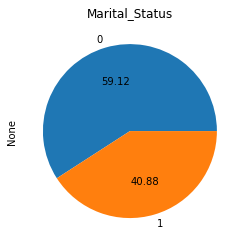

In [14]:
df.groupby('Marital_Status').size().plot(kind = 'pie', x = 'Age', autopct = '%.2f', figsize = (10,4), title = 'Marital_Status')

# 4. Gender Distribution

<AxesSubplot:title={'center':'Gender'}, ylabel='None'>

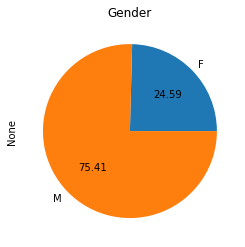

In [15]:
df_pr = df.groupby('Gender').size()
df_pr.plot(kind = 'pie', y = 'Age', autopct = '%.2f', figsize = (10,4), title = 'Gender')